In [125]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import random
from scipy import stats
import random
import pywt.data
from PIL import Image
import pandas as pd
import seaborn as sns
import seaborn as sns
import os
import pickle

In [126]:
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [175]:
pywt.wavelist(kind = "discrete")

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'haar',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',
 'rbio3.3',
 'rbio3.5',
 'rbio3.7',
 'rbio3.9',
 'rbio4.4',
 'rbio5.5',
 'rbio6.8',
 'sym2',
 'sym3',
 'sym4',
 'sym5',
 'sym6',
 'sym7',
 'sym8',
 'sym9',
 'sym10',
 'sym11',
 'sym12',
 'sym13',

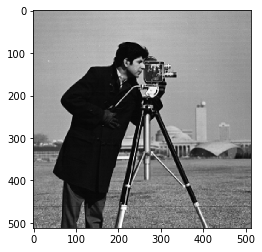

In [127]:
original = np.array(pywt.data.camera())
plt.imshow(original, interpolation="nearest", cmap=plt.cm.gray)

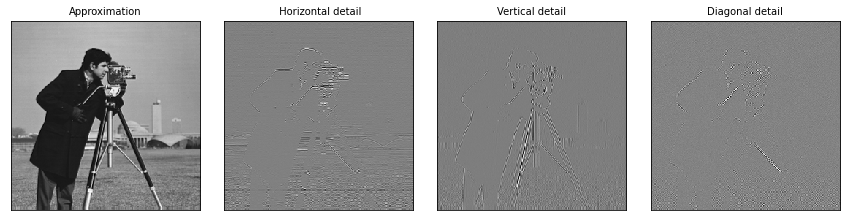

In [146]:
wavelet = "sym5"

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, wavelet)
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [147]:
def FullProcess(path, layer = "All", wv = "db1"):
    image = Image.open(path).convert('L')
    image= (image-np.mean(image))/np.std(image)
    plt.imshow(image, interpolation="nearest", cmap=plt.cm.gray)
    high_depth_image = pywt.wavedec2(image, wv)
    n = len(high_depth_image)
    if layer == "All":
        for j in range(1, n):
            fig = plt.figure(figsize=(12, 3))
            level_data = high_depth_image[j]
            for i, a in enumerate([i for i in level_data]):
                ax = fig.add_subplot(1, 4, i + 1)
                ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
                ax.set_xticks([])
                ax.set_yticks([])

            fig.tight_layout()
            plt.show()
    elif layer != "None":
        fig = plt.figure(figsize=(12, 3))
        level_data = high_depth_image[layer]
        for i, a in enumerate([i for i in level_data]):
            ax = fig.add_subplot(1, 4, i + 1)
            ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
            ax.set_xticks([])
            ax.set_yticks([])

        fig.tight_layout()
        plt.show()
    return n

In [148]:
directory = '/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/Data/Panoptic Agriculture/Original 400 Images'
 
# iterate over files in
# that directory
file_list = [os.path.join(directory, filename) for filename in os.listdir(directory)]
file_names = os.listdir(directory)

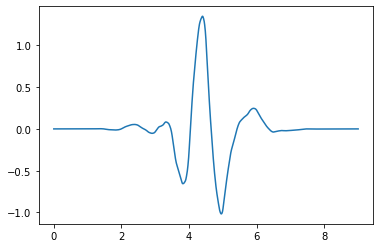

In [149]:
db2 = pywt.Wavelet('sym5')
phi, psi, x = db2.wavefun(level=20)
plt.plot(x,psi)

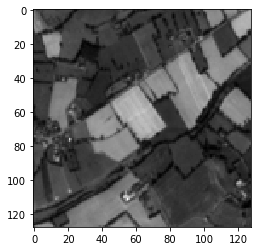

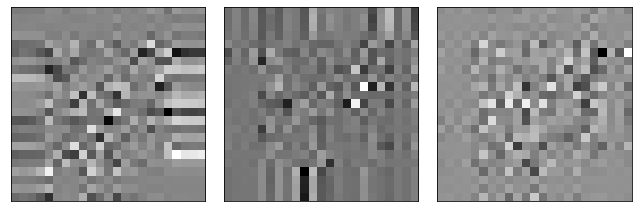

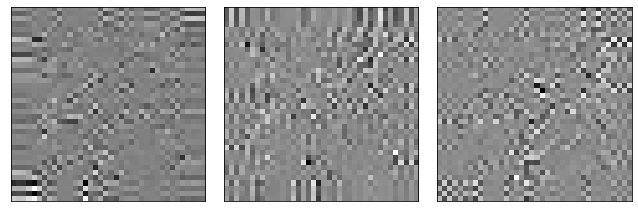

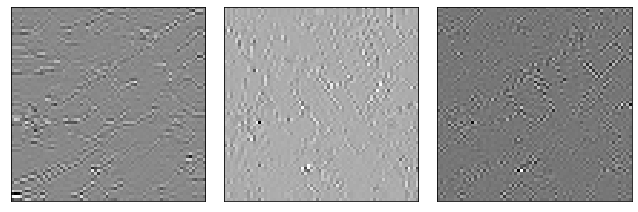

4

In [150]:
FullProcess(file_list[0], wv="sym5")

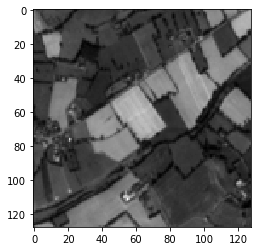

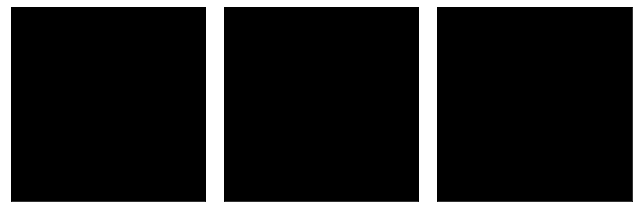

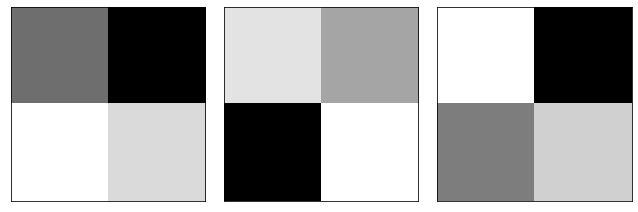

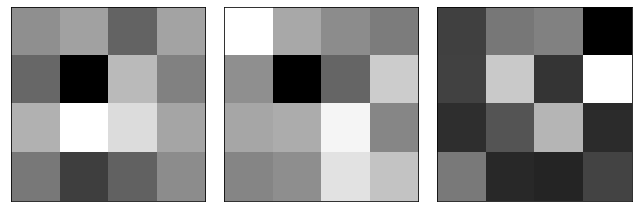

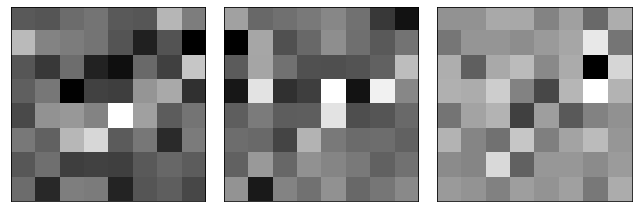

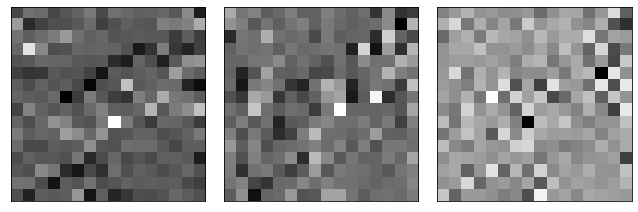

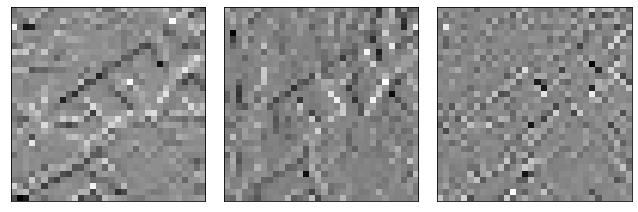

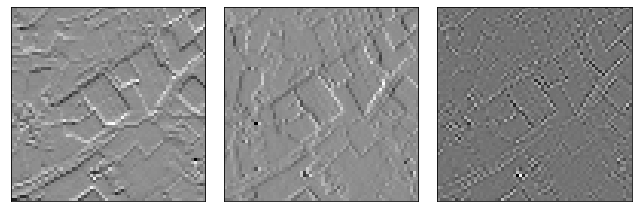

8

In [154]:
FullProcess(file_list[0], wv="db1")

In [136]:
def ReturnLayer(image, layer = "Max", seperate = True, print_k = True, wv= "db1"):
    
    high_depth_image = pywt.wavedec2(image, wv)
    k = len(high_depth_image)
    if print_k:
        print(k)
    if layer == "Max":
        level = high_depth_image[k-1]
    else:
        level = high_depth_image[layer-1]
    if seperate:
        return np.array(level)
    else:
        a = level[0]
        for arr in level[1:]:
            #print(a.shape, arr.shape)
            a = np.append(a, arr, axis= 1)
        level = a
        return np.array(level)

In [137]:
def normalize_image(path):
    image = Image.open(path).convert('L')
    image= (image-np.mean(image))/np.std(image)
    return image

8
0.535400390625


<AxesSubplot:ylabel='Count'>

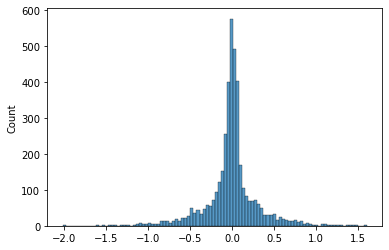

In [138]:
db1_flat = ReturnLayer(normalize_image(file_list[0]), wv= "db1")[0].flatten()
print(sum(abs(db1_flat)<=0.1)/len(db1_flat))
sns.histplot(db1_flat, bins = 100)

4
0.6163494809688581


<AxesSubplot:ylabel='Count'>

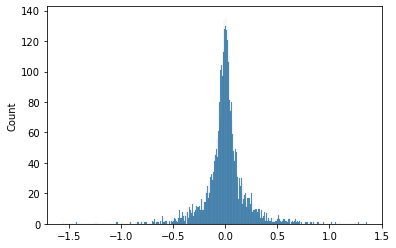

In [159]:
db5_flat = ReturnLayer(normalize_image(file_list[0]), wv= "sym5")[0].flatten()
print(sum(abs(db5_flat)<=0.1)/len(db5_flat))
sns.histplot(db5_flat, bins = 500)

In [180]:
def density_of_layer(flat_layers, method = 0.2, diagonal = True, without_diagonal = False, title = ""):
    
    layer_names = ["Horizantal", "Vertical", "Diagonal"]
    
    if(diagonal):
        fig, axes = plt.subplots(1, 2, figsize=(24, 6))
        fig.suptitle(title)
        for i in range(len(flat_layers)):
            axes[1].set_ylim(bottom = 10**-5, top= 10)
            axes[1].set_xlim(left = -3, right= 3)
            sns.kdeplot(ax = axes[0], x = flat_layers[i], bw_method = method, label = layer_names[i])
            sns.kdeplot(ax = axes[1], x = flat_layers[i], bw_method = method, log_scale=[False, True], label = layer_names[i])
            axes[0].legend()
            axes[1].legend()
    if(without_diagonal):
        fig, axes = plt.subplots(1, 2, figsize=(24, 6))
        fig.suptitle(title)
        for i in range(len(flat_layers[:-1])):
            axes[1].set_ylim(bottom = 10**-5, top= 10)
            axes[1].set_xlim(left = -3, right= 3)
            sns.kdeplot(ax = axes[0], x = flat_layers[i], bw_method = method,label = layer_names[i])
            sns.kdeplot(ax = axes[1], x = flat_layers[i], bw_method = method, log_scale=[False, True],label = layer_names[i])
            axes[0].legend()
            axes[1].legend()
            
    return np.cov(flat_layers)


8


array([[ 1.31216649e-01,  7.68134046e-03, -5.96226009e-05],
       [ 7.68134046e-03,  1.63704219e-01,  6.12884024e-04],
       [-5.96226009e-05,  6.12884024e-04,  1.98418945e-02]])

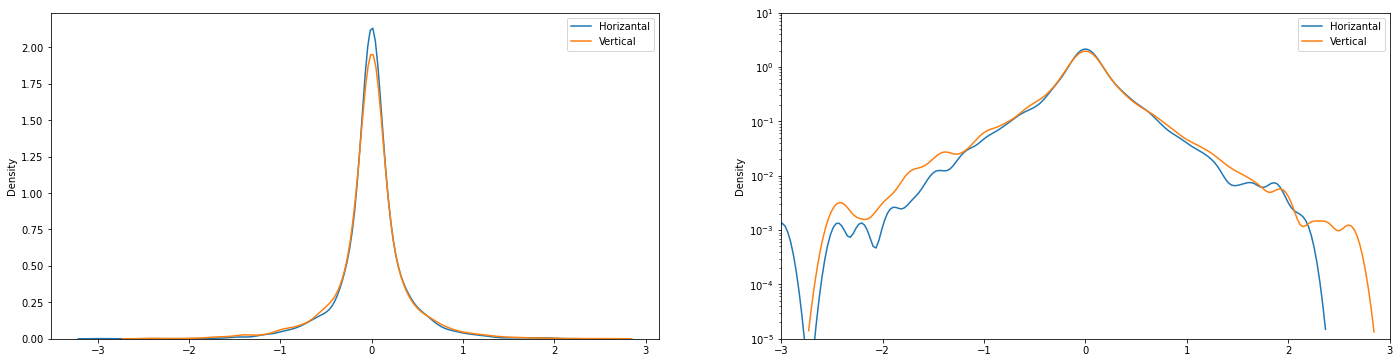

In [181]:
layer_db1 = ReturnLayer(normalize_image(file_list[2]), wv = "db1")
flat_layers_db1 = [x.flatten() for x in layer_db1]
density_of_layer(flat_layers_db1, method = 0.2, diagonal = False, without_diagonal=True)

4


array([[ 0.05848509, -0.00023664, -0.00014778],
       [-0.00023664,  0.09175834, -0.00062891],
       [-0.00014778, -0.00062891,  0.00885613]])

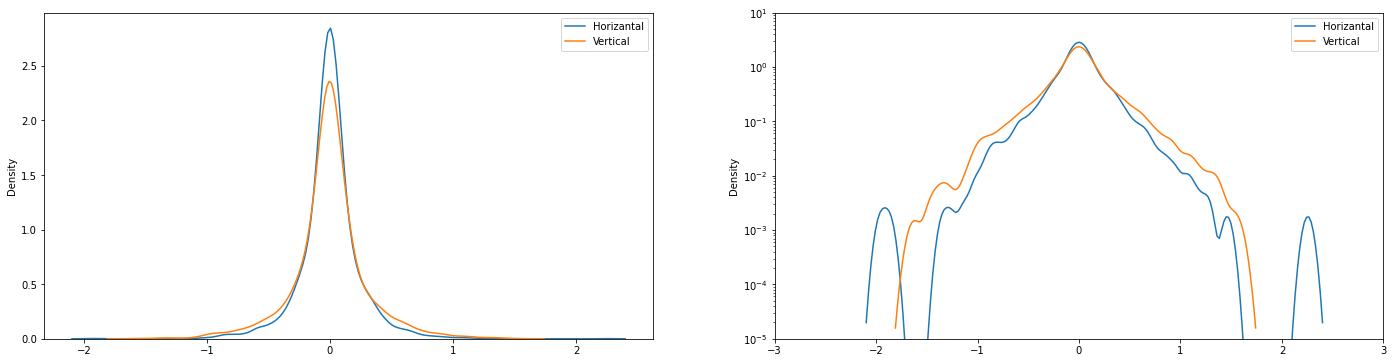

In [182]:
layer_db5 = ReturnLayer(normalize_image(file_list[2]), wv = "sym5")
flat_layers_db5 = [x.flatten() for x in layer_db5]
density_of_layer(flat_layers_db5, method = 0.2, diagonal = False, without_diagonal=True)

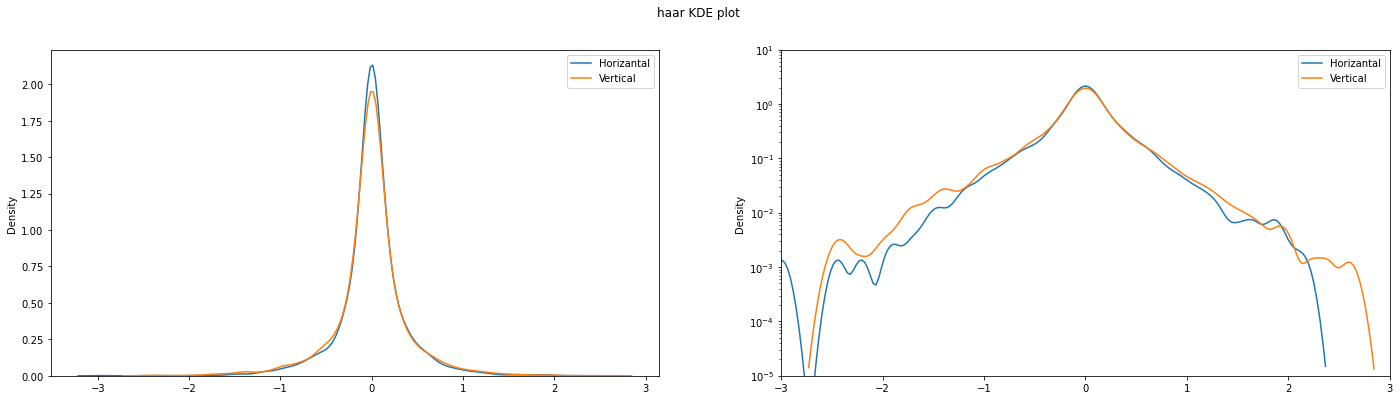

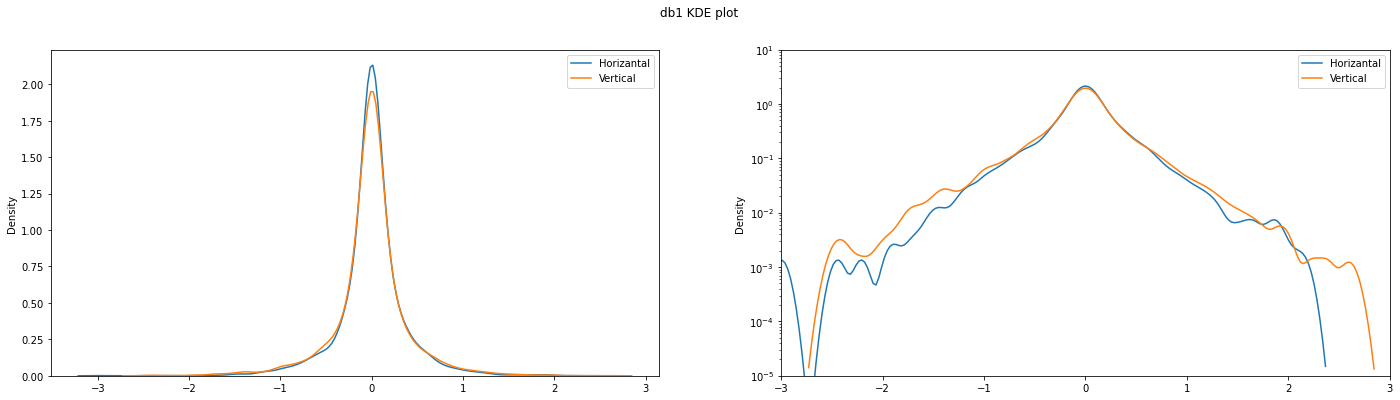

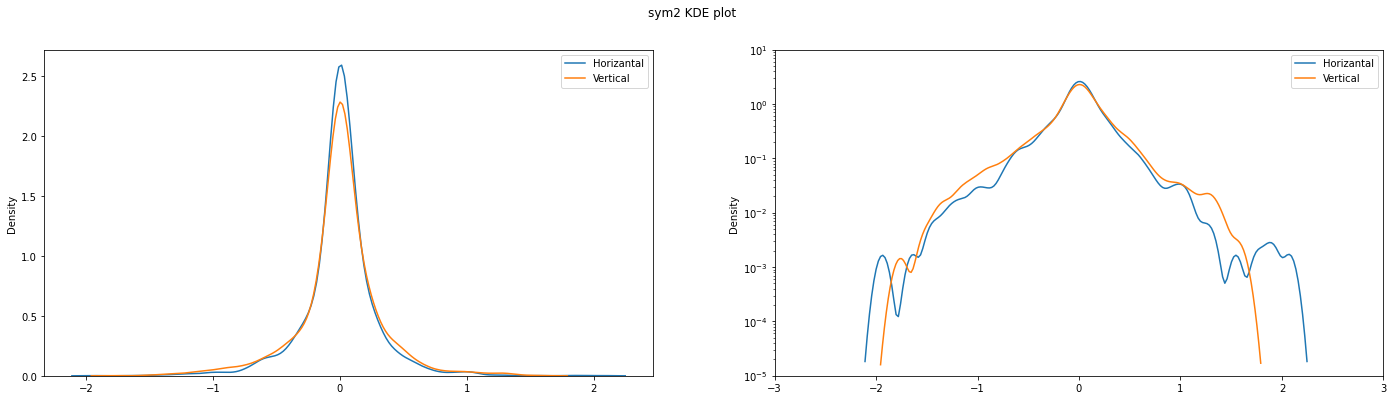

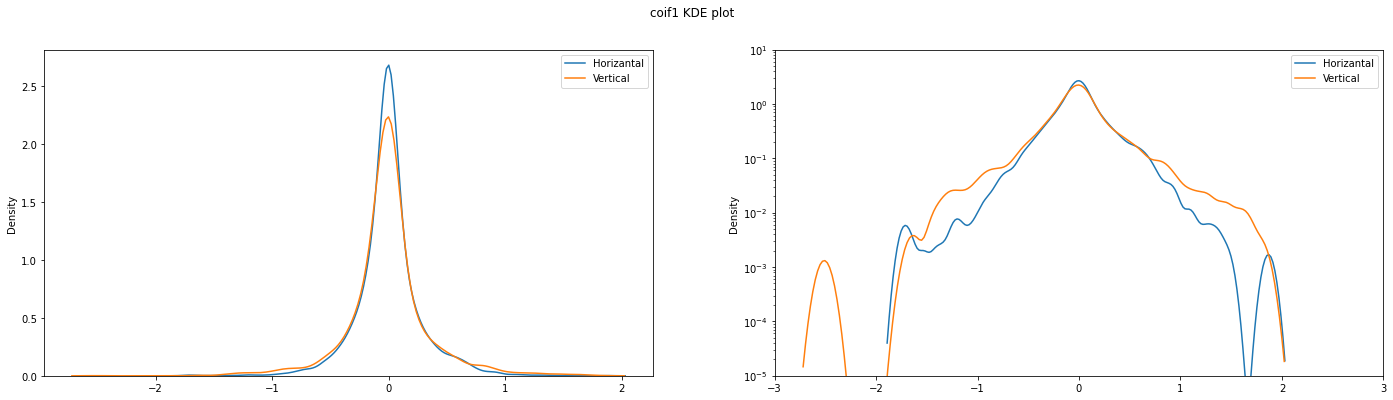

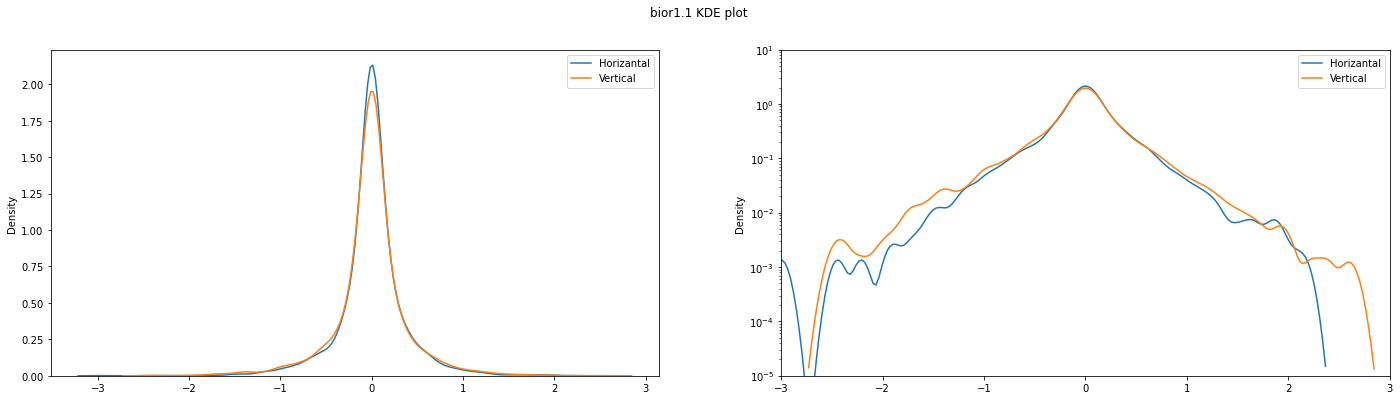

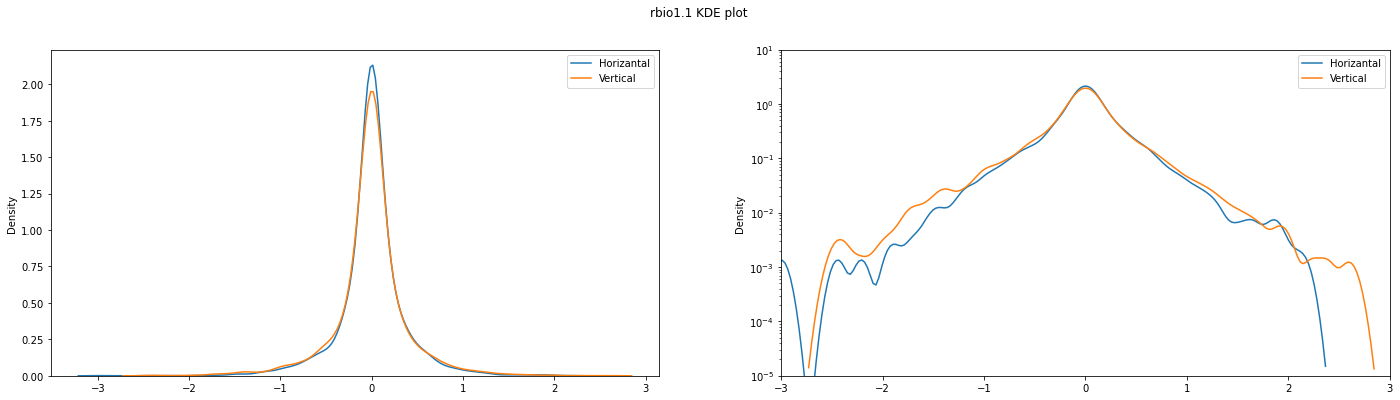

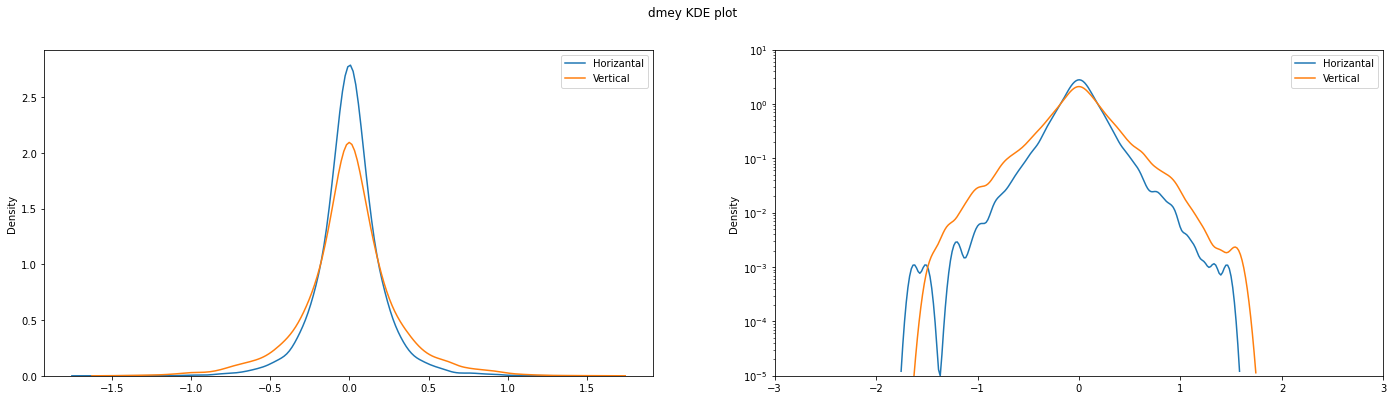

In [183]:
cont_families = pywt.wavelist(kind = "continuous")
for fam in pywt.families():
    wav = pywt.wavelist(fam)[0]
    if wav not in cont_families:
        layer_db5 = ReturnLayer(normalize_image(file_list[2]), wv = wav, print_k=False)
        flat_layers_db5 = [x.flatten() for x in layer_db5]
        density_of_layer(flat_layers_db5, method = 0.2, diagonal = False, without_diagonal=True, title = wav + " KDE plot")


In [164]:
def convert_to_wavelet_basis(folder_dir,  normalized = True, basis="db1"):
    file_list = [os.path.join(folder_dir, filename) for filename in os.listdir(folder_dir)]
    file_names = os.listdir(folder_dir)
    #Setup df Dict
    df_dict = dict()
    image = Image.open(file_list[0]).convert('L')
    first_image = pywt.wavedec2(image, basis)
    layer_len = len(first_image)
    print(str(layer_len) + " layers being used")
    for i in range(layer_len):
        #df = pd.DataFrame(columns=["Image ID", "Orientation", "Data", "Flattened Data"])
        df = pd.DataFrame(columns=["Image ID", "Orientation", "Data"])
        df_dict[i+1] = df
    
    
    #Fill DF DICT
    for k in range(len(file_list)):
        image = Image.open(file_list[k]).convert('L')
        image = np.array(image)
        if normalized:
            std= np.std(image)
            mean = np.mean(image)
            image = (image- mean)/std 
            #image = image * 255
            
        name = file_names[k].split(".")[0]
        transformed = pywt.wavedec2(image, basis)
        #df_dict[1].loc[len(df_dict[1].index)] = [name, "ONELAYER", np.array(transformed[0][0]), np.array(transformed[0][0]).flatten()]
        df_dict[1].loc[len(df_dict[1].index)] = [name, "ONELAYER", np.array(transformed[0][0])]
        direction_names = ['Horizontal detail', 'Vertical detail', 'Diagonal detail']

        for i in range(1, layer_len): 
            for j in range(len(transformed[i])):
                arr = np.array(transformed[i][j])
                df_dict[i+1].loc[len(df_dict[i+1].index)] = [name, direction_names[j], arr]
                #df_dict[i+1].loc[len(df_dict[i+1].index)] = [name, direction_names[j], arr.flatten()]

    return df_dict

In [144]:
db_wavedict = dict()
for wv in pywt.wavelist(family="db", kind='all')[:15]:
    db_wavedict[wv] = convert_to_wavelet_basis(directory, normalized = True, basis= wv)

8 layers being used
6 layers being used
5 layers being used
5 layers being used
4 layers being used
4 layers being used
4 layers being used
4 layers being used
3 layers being used
3 layers being used
3 layers being used
3 layers being used
3 layers being used
3 layers being used
3 layers being used


In [186]:
wav_keys = list(db_wavedict.keys())
for i in wav_keys:
    db_i_dict = db_wavedict[i]
    key = np.max(np.array(list(db_i_dict.keys())))
    layer = db_i_dict[key]
    layer["Flattened Data"] = layer["Data"].apply(lambda x: x.flatten())
    flat_layer = [np.concatenate(layer[layer["Orientation"] == direction]["Flattened Data"].values) for direction in ['Horizontal detail', 'Vertical detail', 'Diagonal detail']]
    density_of_layer(flat_layer, method = 0.02, diagonal = False, without_diagonal = True, title=i+" Layer "+str(key)+" KDE plot")


6